In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
data = pd.read_csv('PG_2007_2017.csv', index_col = 'Date')

In [3]:
log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

,PG
Date,
2017-04-04,0.002562
2017-04-05,0.000667
2017-04-06,-0.006356
2017-04-07,-0.001903
2017-04-10,0.002910


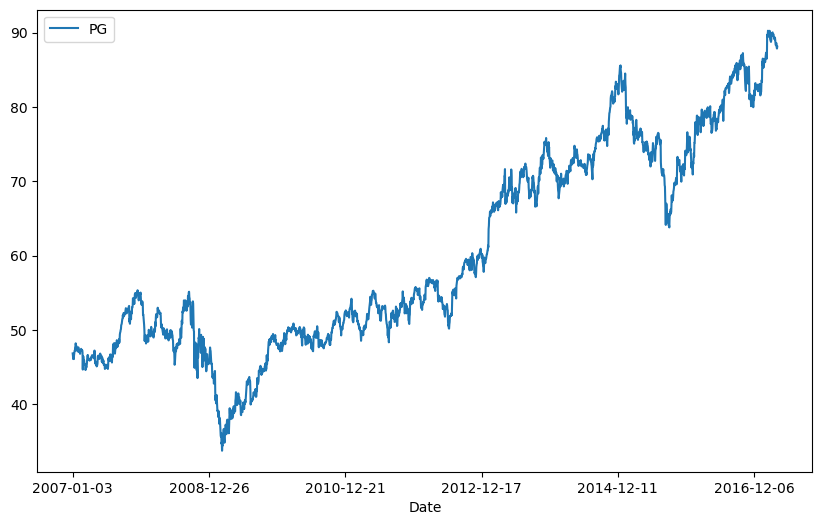

In [5]:
data.plot(figsize=(10, 6));

In [6]:
r = 0.025

In [7]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176109
dtype: float64

In [8]:
type(stdev)

pandas.core.series.Series

In [9]:
stdev = stdev.values
stdev

array([0.17610875])

In [10]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

In [12]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0 

for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [13]:
S

array([[88.118629  , 88.118629  , 88.118629  , ..., 88.118629  ,
        88.118629  , 88.118629  ],
       [88.050491  , 88.42897852, 90.71996057, ..., 86.81382474,
        87.31152552, 89.52390326],
       [87.50120738, 89.18406488, 89.37547922, ..., 87.23018532,
        86.00581358, 88.85699003],
       ...,
       [98.29347186, 92.48337975, 98.68933694, ..., 91.68869811,
        79.51387663, 71.12322204],
       [96.38416654, 92.07184571, 97.64572109, ..., 92.89379654,
        79.44760774, 71.40798088],
       [95.99427812, 92.8298434 , 98.10166831, ..., 92.71224901,
        80.34877378, 71.43645279]])

In [14]:
S.shape

(251, 10000)

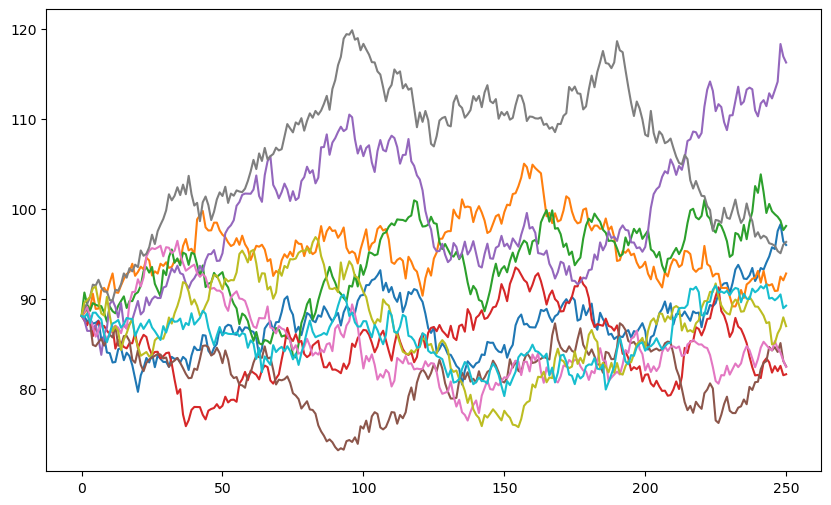

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

******

In [15]:
p = np.maximum(S[-1] - 110, 0)

In [16]:
p

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [17]:
p.shape

(10000L,)

In [18]:
C = np.exp(-r * T) * np.sum(p) / iterations
C  

1.159769289926591